In [16]:
import os
from IPython.core.debugger import set_trace
from models.Mini_REDCNN import REDCNN
from utils import utils
import torch
import torch.nn as nn
import torch.utils.data.sampler as sampler
from torch.autograd import Variable
from matplotlib import pyplot as plt
import numpy as np
import SimpleITK as sitk
import ReadWriteXML as rw

In [3]:
lr_dir = r'C:\Users\Juanig\Desktop\Codigo\ct images\Low resolution'

In [11]:
net_dir = r'C:\Users\Juanig\Desktop\Codigo\ct images\3d_autoencoder_epoch_15.pkl'
model = REDCNN()

if torch.cuda.is_available():
    model.load_state_dict(torch.load(net_dir))
    model.cuda()
else:
    #torch.cuda.set_device('cpu')
    model.load_state_dict(torch.load(net_dir,map_location=lambda storage, location: storage))

model.double()
model.eval()

REDCNN(
  (enc_1): Sequential(
    (0): Conv3d(1, 32, kernel_size=(3, 5, 5), stride=(1, 1, 1))
    (1): ReLU()
  )
  (enc_2): Sequential(
    (0): Conv3d(32, 32, kernel_size=(3, 5, 5), stride=(1, 1, 1))
    (1): ReLU()
  )
  (enc_3): Sequential(
    (0): Conv3d(32, 32, kernel_size=(3, 5, 5), stride=(1, 1, 1))
    (1): ReLU()
  )
  (enc_4): Sequential(
    (0): Conv3d(32, 32, kernel_size=(3, 5, 5), stride=(1, 1, 1))
    (1): ReLU()
  )
  (dec_1_deconv): ConvTranspose3d(32, 32, kernel_size=(3, 5, 5), stride=(1, 1, 1))
  (dec_1_ReLU): ReLU()
  (dec_2_deconv): ConvTranspose3d(32, 32, kernel_size=(3, 5, 5), stride=(1, 1, 1))
  (dec_2_ReLU): ReLU()
  (dec_3_deconv): ConvTranspose3d(32, 32, kernel_size=(3, 5, 5), stride=(1, 1, 1))
  (dec_3_ReLU): ReLU()
  (dec_4_deconv): ConvTranspose3d(32, 1, kernel_size=(3, 5, 5), stride=(1, 1, 1))
)

In [18]:
patch_size = (23, 47, 47)
stride = (20, 10, 10)
input_volume_ = rw.OpenXML(os.path.join(lr_dir, '5a_100_FBPPhil_Scan1Slices.xml'), kind = 'Slices' )
input_volume = sitk.GetArrayFromImage(input_volume_)

output_volume = np.zeros(input_volume.shape)
mask = np.ones(input_volume.shape)

patch = np.zeros(patch_size) 

patch[:,:,:] = input_volume[0:patch_size[0], 0:patch_size[1], 0:patch_size[2]]

lo_res_ = torch.from_numpy(patch)
lo_res_ = lo_res_.unsqueeze(0)
lo_res_ = lo_res_.unsqueeze(1)
lo_res_ = utils.var_or_cuda( lo_res_ )
net_output = model(lo_res_)     
#casteo a tensor
#output_patch = smth
#output_patch = patch
output_patch = net_output
output_cpu_ = output_patch.detach()
output_cpu_ = output_cpu_.cpu()
output_cpu = output_cpu_[0][0][:][:][:]
output_volume[0:patch_size[0], 0:patch_size[1], 0:patch_size[2]] = output_cpu

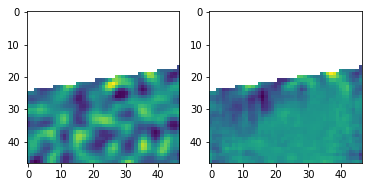

In [19]:
slc = 10
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(patch[slc][:][:])
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(output_cpu[slc][:][:])

In [ ]:
patch_size = (23, 47, 47)
stride = (20, 10, 10)
input_volume_ = rw.OpenXML(os.path.join(lr_dir, '5a_100_FBPPhil_Scan1Slices.xml'), kind = 'Slices' )
input_volume = sitk.GetArrayFromImage(input_volume_)

output_volume = np.zeros(input_volume.shape)
mask = np.ones(input_volume.shape)

for i,j,k in next_index(patch_size, stride):
    patch = np.zeros(patch_size) 
    i_max = min(i, nparray.shape[0] - 1)
    j_max = min(j, nparray.shape[1] - 1)
    k_max = min(k, nparray.shape[2] - 1)
    patch[:,:,:] = input_volume[i:i_max, j:j_max, k:k_max]
    
    lo_res_ = torch.from_numpy(patch)
    lo_res_ = lo_res_.unsqueeze(0)
    lo_res_ = lo_res_.unsqueeze(1)
    lo_res_ = utils.var_or_cuda( lo_res_ )
    net_output = model(lo_res_)     
    #casteo a tensor
    #output_patch = smth
    #output_patch = patch
    output_patch = net_output
    output_cpu_ = output_patch.detach()
    output_cpu_ = output_cpu_.cpu()
    output_cpu = output_cpu_[0][0][:][:][:]
    output_volume[i:i_max, j:j_max, k:k_max] += output_cpu
    mask[i:i_max, j:j_max, k:k_max] += np.ones(patch_size)
    
output_volume = output_volume / mask

In [22]:
a1 = np.ones((3,3,3)) * 2
b1 = np.ones((3,3,3)) * 4
a1/b1

array([[[0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]],

       [[0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]],

       [[0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]]])